# Segmentation...
- In this part i will segment the customers using Kmeans and ruled based mathod...

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import iplot
import pandas as pd
import plotly.graph_objs as go
#import cufflinks
from plotly.offline import init_notebook_mode
from tqdm import tqdm
from scipy.stats.mstats import winsorize

In [4]:
df=pd.read_csv('cust_inv_merged_final.csv').drop('Unnamed: 0',axis=1)
df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,7005200005,174158,84419,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


### Service Type

In [5]:
revenue=df.groupby('Customer No.')['Total Amt Wtd Tax.'].agg(["count","mean"])
revenue.head()

,count,mean
Customer No.,,
1,4,0.000000
10,5,2221.112000
100,2,10399.870000
1000,6,1468.906667
10000,7,247.931429


In [6]:
labour=df.groupby('Customer No.')['Total Amt Wtd Tax.'].agg(["count","mean"])
labour.head()

,count,mean
Customer No.,,
1,4,0.000000
10,5,2221.112000
100,2,10399.870000
1000,6,1468.906667
10000,7,247.931429


In [7]:
df['Customer No.']=df['Customer No.'].drop_duplicates().dropna()

In [8]:
new_df=df.dropna()

In [9]:
new_df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12
5,7005200007,174053,84457,Retail,1,Running Repairs,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TOYOTA,INNOVA,1566000,High Range,01-Mar,0,20.90,0 days 20:54:58.000000000,13122,2015,1,Winter,0.00,14.22,851.70,0.00,0.0,865.92


In [10]:
new_df=new_df.set_index('Customer No.')

In [11]:
revenue.columns=['Frequency','Monetry']

In [12]:
cluster=pd.concat([new_df['Order Type'],revenue],axis=1)
cluster

,Order Type,Frequency,Monetry
67849,Paid Service,5,14905.050000
84419,SMC Value Package,6,606.433333
81055,Running Repairs,3,3031.073333
18980,Paid Service,8,5833.057500
84457,Running Repairs,3,1909.593333
...,...,...,...
203817,Paid Service,1,1804.430000
203808,Paid Service,1,2229.070000
203844,Paid Service,1,12052.140000
203820,Paid Service,1,4458.150000


In [13]:
cluster1=cluster.copy()
cluster1.head()

,Order Type,Frequency,Monetry
67849,Paid Service,5,14905.050000
84419,SMC Value Package,6,606.433333
81055,Running Repairs,3,3031.073333
18980,Paid Service,8,5833.057500
84457,Running Repairs,3,1909.593333


In [14]:
cluster1=pd.get_dummies(cluster1)
cluster1

,Frequency,Monetry,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Order Type_Workshop Damage
67849,5,14905.050000,0,0,1,0,0,0,0,0,0
84419,6,606.433333,0,0,0,0,0,0,1,0,0
81055,3,3031.073333,0,0,0,0,1,0,0,0,0
18980,8,5833.057500,0,0,1,0,0,0,0,0,0
84457,3,1909.593333,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203817,1,1804.430000,0,0,1,0,0,0,0,0,0
203808,1,2229.070000,0,0,1,0,0,0,0,0,0
203844,1,12052.140000,0,0,1,0,0,0,0,0,0
203820,1,4458.150000,0,0,1,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import scale
cluster_new=scale(cluster1)

In [16]:
from sklearn.cluster import KMeans

# sum_of_sq_dist = {}
# for k in tqdm(range(1,15)):
#     km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
#     km = km.fit(cluster_new)
#     sum_of_sq_dist[k] = km.inertia_
    
# #Plot the graph for the sum of square distance values and Number of Clusters
# sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
# plt.xlabel('Number of Clusters(k)')
# plt.ylabel('Sum of Square Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(cluster_new)
centroids=km.cluster_centers_
wcss=km.inertia_
print(centroids,wcss)

[[-7.74832645e-03  1.95751997e-03 -3.19650166e-01 -1.82055534e-01
   1.50219850e+00 -1.72036110e-02 -1.09088959e+00 -6.53520993e-02
  -1.43493026e-01 -3.44023351e-03 -4.86525367e-03]
 [-1.20869012e-02 -1.96459021e-01 -3.19650166e-01 -1.82055534e-01
  -6.65690986e-01  1.42097928e-02  8.99878687e-01  5.39793530e-02
  -1.43493026e-01  2.84155491e-03  4.01858928e-03]
 [-5.07574768e-02 -1.12806191e-01 -3.19650166e-01  5.49282947e+00
  -6.65690986e-01 -1.72036110e-02 -1.09088959e+00 -6.53520993e-02
  -1.43493026e-01 -3.44023351e-03 -4.86525367e-03]
 [ 6.07223713e-01 -2.00418461e-01 -3.19650166e-01 -1.82055534e-01
  -6.63574320e-01 -1.72036110e-02 -1.09010553e+00 -6.53520993e-02
   6.95925763e+00 -3.44023351e-03 -4.86525367e-03]
 [-1.76254480e-02  1.23121316e+00  3.11279086e+00 -1.82055534e-01
  -6.63119567e-01 -1.72036110e-02 -1.08417103e+00 -6.53520993e-02
  -1.43493026e-01 -3.44023351e-03 -4.86525367e-03]] 1483291.6133897924


In [18]:
cluster['cluster']=km.fit_predict(cluster_new)
cluster

,Order Type,Frequency,Monetry,cluster
67849,Paid Service,5,14905.050000,0
84419,SMC Value Package,6,606.433333,3
81055,Running Repairs,3,3031.073333,1
18980,Paid Service,8,5833.057500,0
84457,Running Repairs,3,1909.593333,1
...,...,...,...,...
203817,Paid Service,1,1804.430000,0
203808,Paid Service,1,2229.070000,0
203844,Paid Service,1,12052.140000,0
203820,Paid Service,1,4458.150000,0


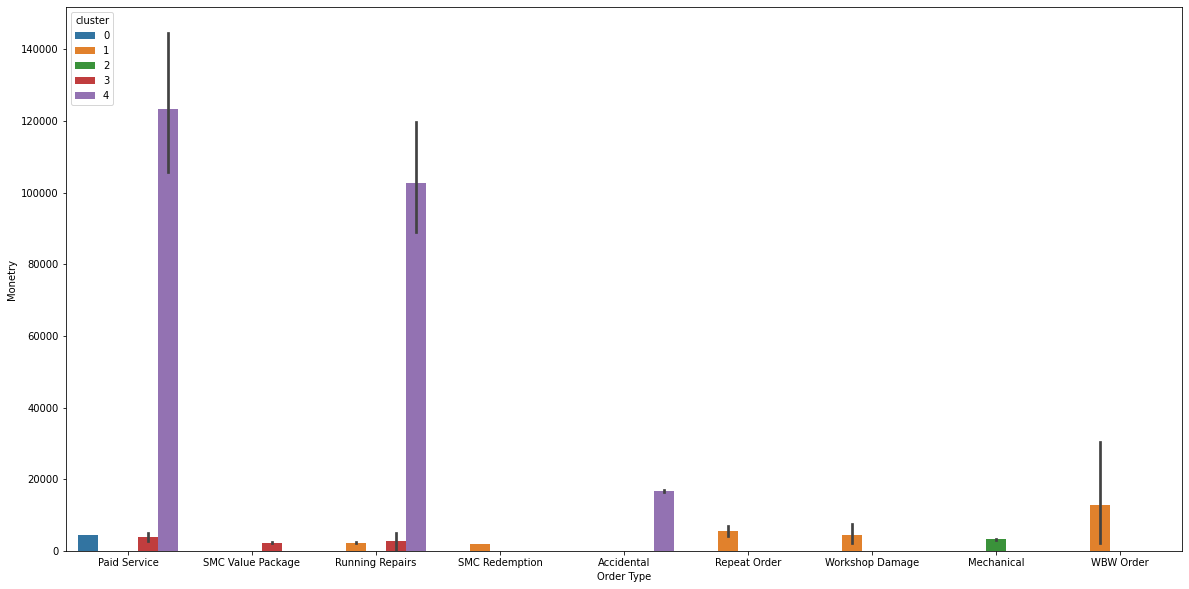

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(cluster['Order Type'],cluster['Monetry'],hue=cluster['cluster'])

In [20]:
cluster.groupby(['cluster','Order Type'])['Frequency'].count().reset_index()

,cluster,Order Type,Frequency
0,0,Paid Service,77803
1,1,Repeat Order,75
2,1,Running Repairs,137658
3,1,SMC Redemption,1078
4,1,WBW Order,3
5,1,Workshop Damage,6
6,2,Mechanical,8132
7,3,Paid Service,5
8,3,Running Repairs,2
9,3,SMC Value Package,5114


## RFM Modelling On Customer Number

In [21]:
invoice=pd.read_csv('Final_invoice.csv')

In [22]:
invoice.tail()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
492309,984736,NaN,NaN,.,NaN,NaN,NaN,NaN,Chennai,NaN,NaN,Retail,203820,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000017,14:56:58,400100,2016-06-30,09:15:12,72546,2495.90,MARUTI SUZUKI,374.97,ALTO,NaN,0.0,Paid Service,NaN,1587.28,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN38Y9343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4458.15,NaN,NaN,NaN,NaN,NaN,X405SA1
492310,984737,NaN,NaN,.,NaN,NaN,NaN,NaN,ADAMBAKKAM,NaN,NaN,Retail,170411,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000018,15:06:52,400092,2016-06-30,08:42:15,18968,2443.47,NISSAN,0.00,MICRA,NaN,0.0,Paid Service,NaN,4388.61,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN22CK0396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6832.08,NaN,NaN,NaN,NaN,NaN,X405SA1
492311,984738,NaN,NaN,CHENNAI,NaN,NaN,NaN,NaN,CHENNAI,NaN,NaN,Retail,48811,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000019,15:43:56,400082,2016-06-30,08:27:51,177433,2598.92,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,NaN,0.0,Paid Service,NaN,6588.79,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN07BA0211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9187.71,NaN,NaN,NaN,NaN,NaN,X405SA1
492312,984739,NaN,NaN,"DK NAGAR EXTN,",NaN,NaN,NaN,NaN,"Vijaya Nagar, 1 main road,Velacherr",NaN,NaN,Retail,204067,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000020,15:58:59,400545,2016-06-30,12:53:48,22932,11000.00,HONDA,100.00,AMAZE,NaN,0.0,Accidental,NaN,0.00,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN07BV9290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11100.00,NaN,NaN,NaN,NaN,NaN,X405SA1
492313,984740,NaN,NaN,2ND FLOOR,NaN,NaN,NaN,NaN,saidapet,NaN,NaN,Retail,204288,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000021,17:09:19,400891,2016-06-30,16:54:06,149197,747.78,MARUTI SUZUKI,0.00,WAGONR,NaN,0.0,Running Repairs,NaN,0.00,600016,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN10T3317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747.78,NaN,NaN,NaN,NaN,NaN,X405WM1


In [23]:
new_df=invoice[['Invoice No','Customer No.','Invoice Date','Total Amt Wtd Tax.']]
new_df.head()

,Invoice No,Customer No.,Invoice Date,Total Amt Wtd Tax.
0,7005200002,67849,2015-01-02,4051.95
1,7005200003,84419,2015-01-03,1001.29
2,7005200004,81055,2015-01-03,233.14
3,7005200005,84419,2015-01-03,0.00
4,7005200006,18980,2015-01-03,2747.12


In [24]:
invoice[invoice['Total Amt Wtd Tax.']==0]['Order Type'].value_counts()

Running Repairs    28574
SMC Redemption     14738
Paid Service        3894
Repeat Order        3041
Mechanical          1369
Accidental           529
Workshop Damage       17
WBW Order              1
Name: Order Type, dtype: int64

In [25]:
invoice[invoice['Order Type'].isin(['SMC Redemption','SMC Value Package','Running Repairs','Paid Service'])]['Total Amt Wtd Tax.'].mean()

3164.4792354969613

In [26]:
new_df=new_df[new_df['Total Amt Wtd Tax.']>100]

In [27]:
new_df['Invoice Date']=pd.to_datetime(new_df['Invoice Date'])

In [28]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2016-10-31. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2016,10,31)

#Create RFM Modelling scores for each customer
RFMScores = new_df.groupby('Customer No.').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Amt Wtd Tax.': lambda x: x.mean()})

#Convert Invoice Date into type int
RFMScores['Invoice Date'] = RFMScores['Invoice Date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'Invoice Date': 'Recency', 
                         'Invoice No': 'Frequency', 
                         'Total Amt Wtd Tax.': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,Customer No.,Recency,Frequency,Monetary
0,10,1232,5,2221.112000
1,100,1510,2,10399.870000
2,1000,748,6,1468.906667
3,10000,436,4,433.880000
4,100000,562,1,6026.050000


In [29]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    230958.000000
mean        443.076226
std         405.393708
min           0.000000
25%         104.000000
50%         303.000000
75%         712.000000
max        1673.000000
Name: Recency, dtype: float64

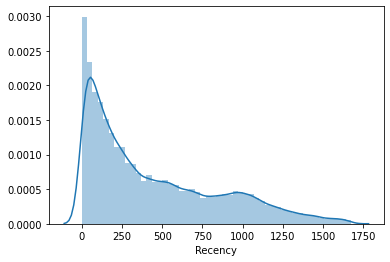

In [30]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [31]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    230958.000000
mean          1.823093
std           6.225497
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2590.000000
Name: Frequency, dtype: float64

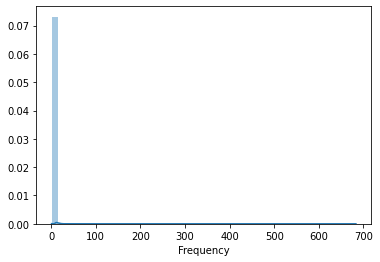

In [32]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

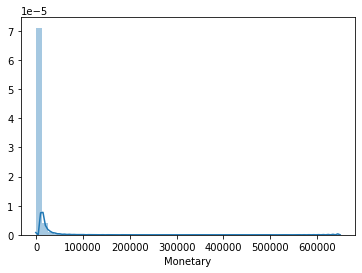

In [33]:
#Monetary distribution plot
import seaborn as sns
x = RFMScores['Monetary']

ax = sns.distplot(x)

In [34]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count    230958.000000
mean       4989.365267
std       11096.224970
min         100.030000
25%         698.600000
50%        2276.725000
75%        5207.996250
max      648203.490000
Name: Monetary, dtype: float64

In [35]:
RFMScores.Monetary=RFMScores.Monetary.apply(lambda x:x if x>=0 else -x )

In [36]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [37]:
quantiles

{'Recency': {0.25: 104.0, 0.5: 303.0, 0.75: 712.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 698.6, 0.5: 2276.725, 0.75: 5207.996249999999}}

In [38]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [39]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
Customer No.,,,,,,
10,1232,5,2221.112000,4,1,3
100,1510,2,10399.870000,4,2,1
1000,748,6,1468.906667,4,1,3
10000,436,4,433.880000,3,1,4
100000,562,1,6026.050000,3,4,1


In [40]:
RFMScores.F=RFMScores.F.replace(4,3)

In [435]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
Customer No.,,,,,,,,,,
10,1232,5,2221.112000,4,1,3,413,8,Gold,1
100,1510,2,10399.870000,4,2,1,421,7,Gold,1
1000,748,6,1468.906667,4,1,3,413,8,Gold,1
10000,436,4,433.880000,3,1,4,314,8,Gold,1
100000,562,1,6026.050000,3,3,1,331,7,Gold,2


In [436]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
Customer No.,,,,,,,,,,
10,1232,5,2221.112000,4,1,3,413,8,Gold,1
100,1510,2,10399.870000,4,2,1,421,7,Gold,1
1000,748,6,1468.906667,4,1,3,413,8,Gold,1
10000,436,4,433.880000,3,1,4,314,8,Gold,1
100000,562,1,6026.050000,3,3,1,331,7,Gold,2


In [437]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,Customer No.,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,10,1232,5,2221.112000,4,1,3,413,8,Gold,1
1,100,1510,2,10399.870000,4,2,1,421,7,Gold,1
2,1000,748,6,1468.906667,4,1,3,413,8,Gold,1
3,10000,436,4,433.880000,3,1,4,314,8,Gold,1
4,100000,562,1,6026.050000,3,3,1,331,7,Gold,2


In [438]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='434'].sort_values('Monetary', ascending=False).reset_index().head(10)

,Customer No.,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,31783,1092,1,698.6,4,3,4,434,11,Bronze,0
1,36396,1054,1,698.6,4,3,4,434,11,Bronze,0
2,36407,1057,1,698.6,4,3,4,434,11,Bronze,0
3,12400,1311,1,698.6,4,3,4,434,11,Bronze,0
4,12397,1311,1,698.6,4,3,4,434,11,Bronze,0
5,57149,917,1,698.6,4,3,4,434,11,Bronze,0
6,E22373,1045,1,698.6,4,3,4,434,11,Bronze,0
7,69467,800,1,698.6,4,3,4,434,11,Bronze,0
8,E22506,1356,1,698.6,4,3,4,434,11,Bronze,0
9,29879,1106,1,698.6,4,3,4,434,11,Bronze,0


In [439]:
rfm_avg=RFMScores.groupby('RFM_Loyalty_Level').agg({'Recency': lambda x:x.mean(), 'Frequency': lambda x:x.mean(), 'Monetary': lambda x: x.mean()})
rfm_avg

,Recency,Frequency,Monetary
RFM_Loyalty_Level,,,
Platinum,193.509116,2.905325,8942.122329
Gold,420.904859,1.526333,4930.206870
Silver,575.000421,1.157359,1443.499953
Bronze,874.436230,1.036082,668.045517


In [440]:
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")
graph

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
Customer No.,,,,,,,,,,
10,1232,5,2221.112000,4,1,3,413,8,Gold,1
100,1510,2,10399.870000,4,2,1,421,7,Gold,1
1000,748,6,1468.906667,4,1,3,413,8,Gold,1
10000,436,4,433.880000,3,1,4,314,8,Gold,1
100000,562,1,6026.050000,3,3,1,331,7,Gold,2
...,...,...,...,...,...,...,...,...,...,...
PLX109,6,7,3603.530000,1,1,2,112,4,Platinum,3
PLX241,17,1,3477.370000,1,3,2,132,6,Platinum,4
PLX277,5,1,6870.950000,1,3,1,131,5,Platinum,4


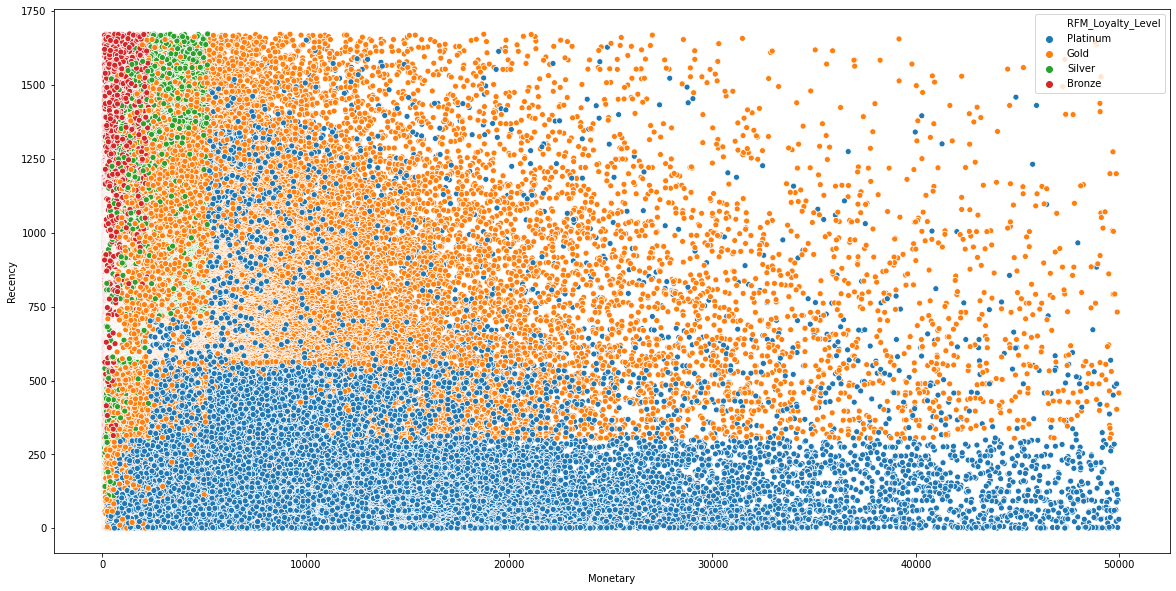

In [441]:
x=graph['Monetary']
y=graph['Recency']
z=graph['RFM_Loyalty_Level']
plt.figure(figsize=(20,10))
sns.scatterplot(x,y,hue=z)
#plt.xlim(0,20)

- here i am getting a little mixed plot which is effect of frequency

(0.0, 50.0)

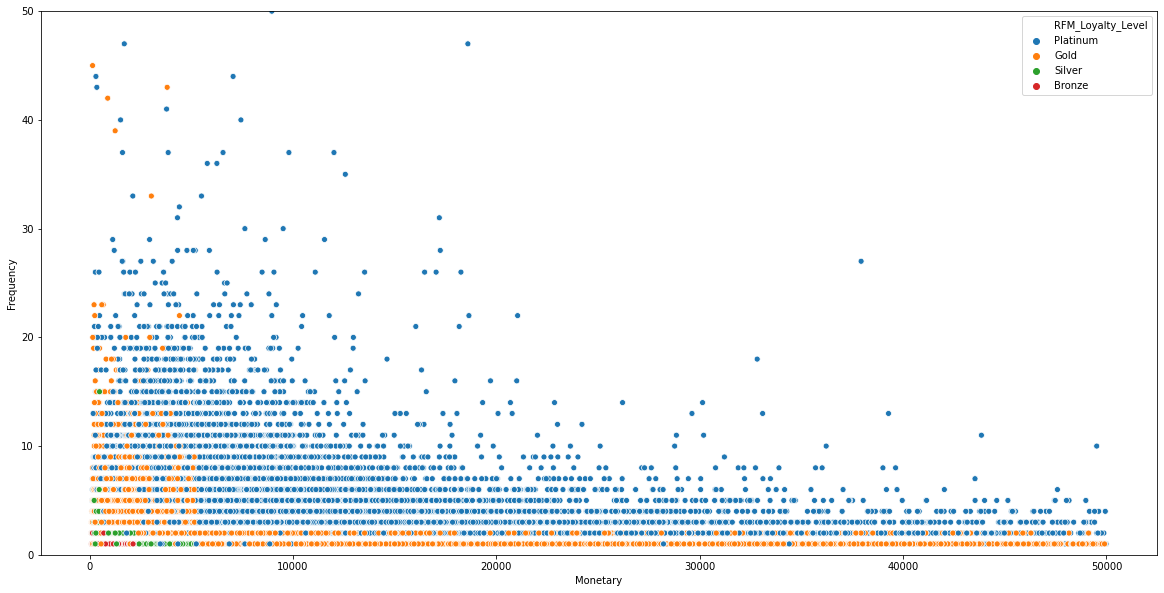

In [442]:
x=graph['Monetary']
y=graph['Frequency']
z=graph['RFM_Loyalty_Level']
plt.figure(figsize=(20,10))
sns.scatterplot(x,y,hue=z)
plt.ylim(0,50)

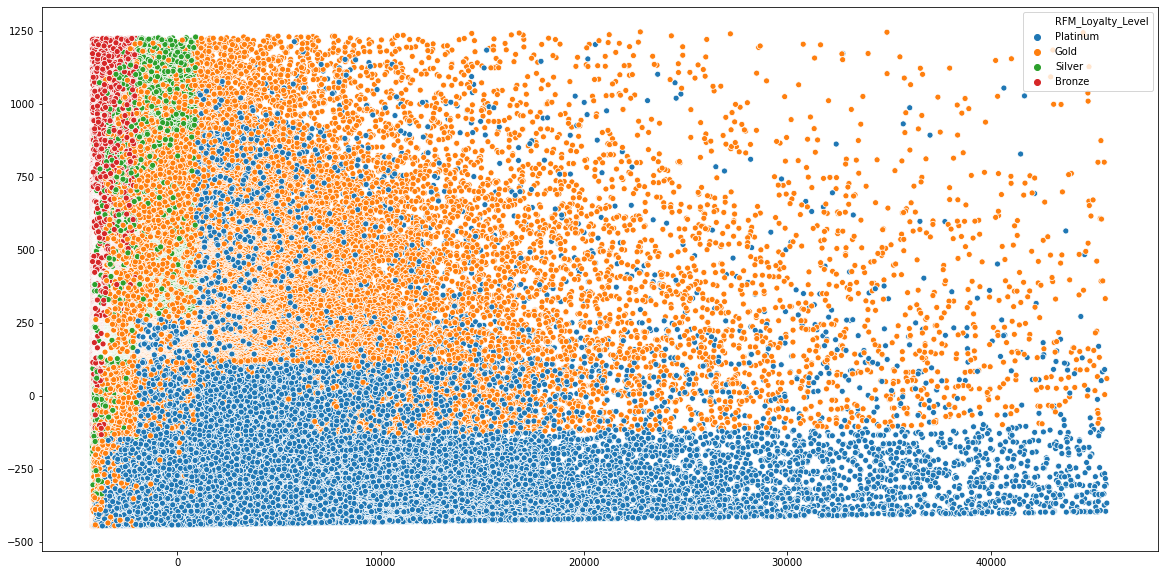

In [443]:
from sklearn.decomposition import PCA
plt.figure(figsize=(20,10))
pca=PCA(n_components=2, random_state=0)
sns.scatterplot(pca.fit_transform(graph[['Recency','Frequency','Monetary']])[:,0],pca.fit_transform(graph[['Recency','Frequency','Monetary']])[:,1],hue=graph['RFM_Loyalty_Level'])

- frequency value of bronze and silver  is near to 1 ,so here only we are seeing impact of platinum and gold

## Clustering Using Kmeans

In [467]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [468]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(Log_Tfd_Data)

Recency --------- 4880
Frequency --------- 8158
Monetary --------- 402


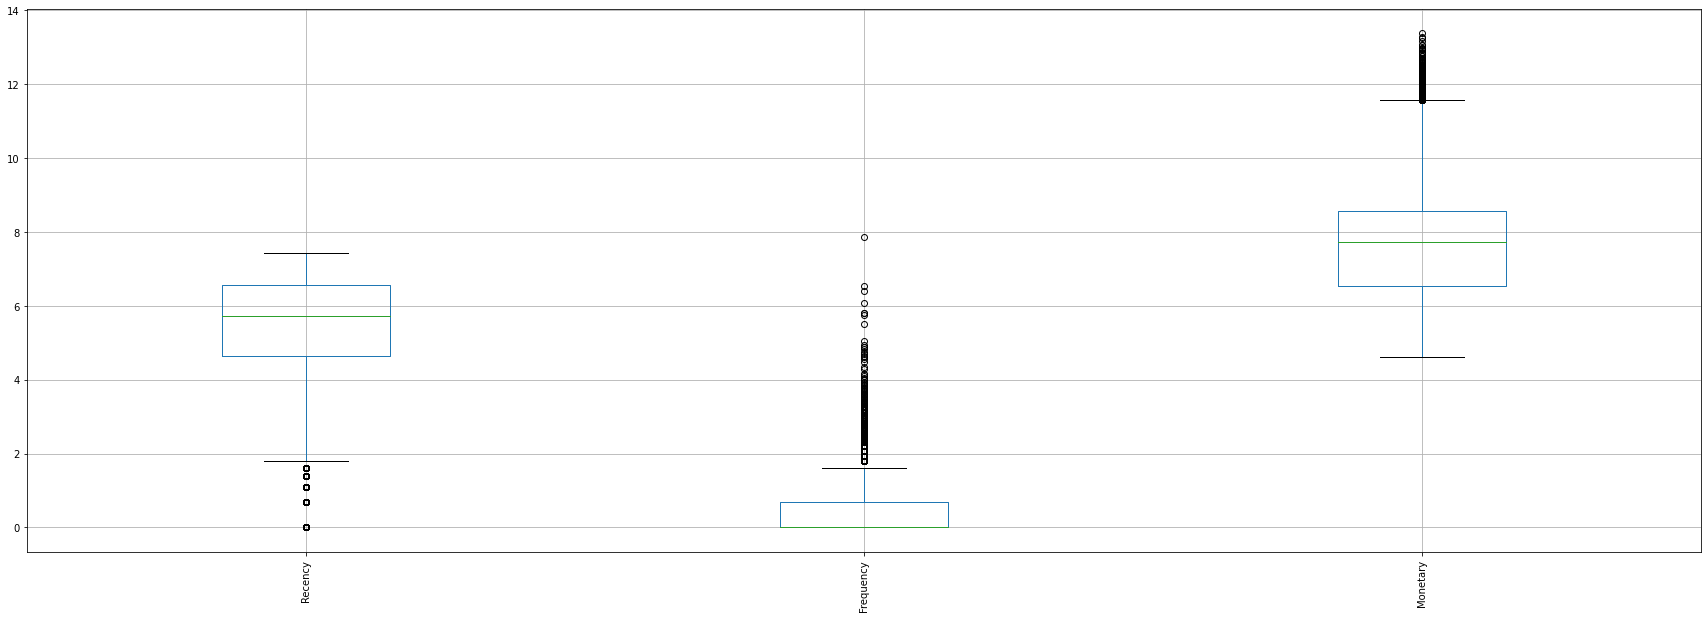

In [469]:
Log_Tfd_Data.boxplot(rot=90, figsize=(30,10))

In [470]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

Log_Tfd_Data=treat_outliers(Log_Tfd_Data)

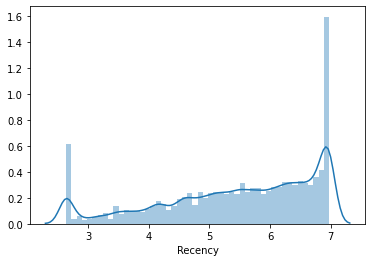

In [471]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

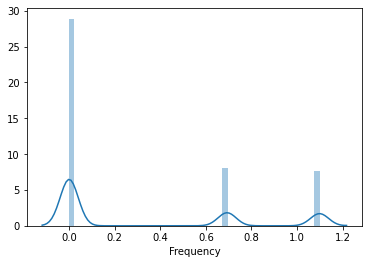

In [472]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

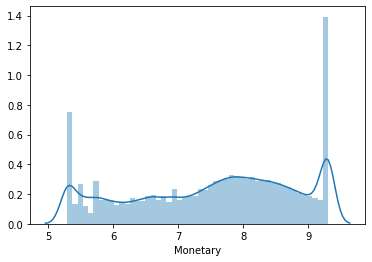

In [473]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [474]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [475]:
# from sklearn.cluster import KMeans

# sum_of_sq_dist = {}
# for k in tqdm(range(1,15)):
#     km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
#     km = km.fit(Scaled_Data)
#     sum_of_sq_dist[k] = km.inertia_
    
# #Plot the graph for the sum of square distance values and Number of Clusters
# sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
# plt.xlabel('Number of Clusters(k)')
# plt.ylabel('Sum of Square Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [476]:
#Perform K-Mean Clustering or build the K-Means clustering model
from sklearn.cluster import KMeans

KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
Customer No.,,,,,,,,,,
10,1232,5,2221.112000,4,1,3,413,8,Gold,4
100,1510,2,10399.870000,4,2,1,421,7,Gold,4
1000,748,6,1468.906667,4,1,3,413,8,Gold,4
10000,436,4,433.880000,3,1,4,314,8,Gold,4
100000,562,1,6026.050000,3,3,1,331,7,Gold,2


In [477]:
Scaled=RFMScores[['Recency', 'Frequency', 'Monetary','Cluster']]

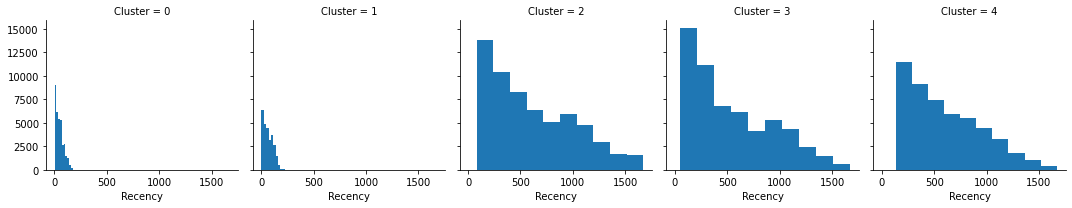

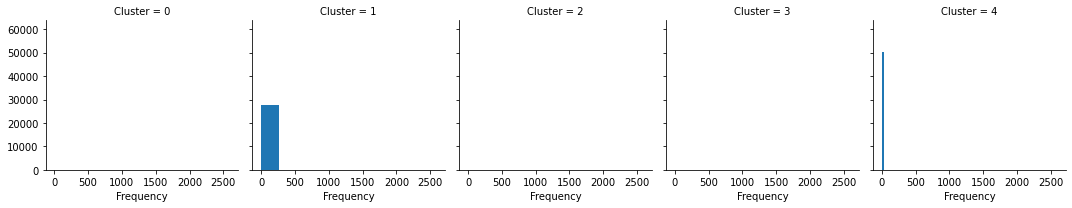

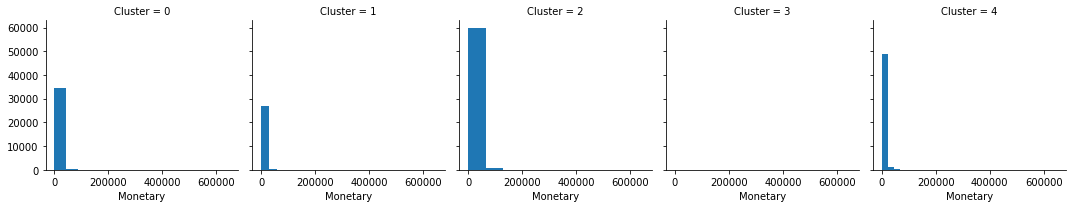

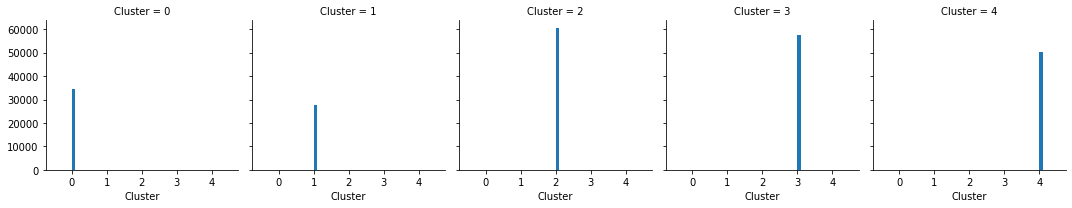

In [478]:
import seaborn as sns
for c in Scaled:
    grid= sns.FacetGrid(Scaled, col='Cluster')
    grid.map(plt.hist, c)

In [479]:
# from sklearn.metrics import silhouette_score
# silhouette_score(Scaled_Data,KMean_clust.fit(Scaled_Data))
rfm_avg1=RFMScores.groupby(['Cluster']).agg({'Recency': lambda x:x.mean(), 'Frequency': lambda x:x.mean(), 'Monetary': lambda x: x.mean()})
rfm_avg1


,Recency,Frequency,Monetary
Cluster,,,
0,49.856191,1.000000,4511.143580
1,65.043393,3.584913,5144.280400
2,612.031233,1.000000,8686.415407
3,540.000399,1.058230,480.356032
4,605.374804,3.292463,5929.062714


- 0:Loyal customer(Diamond),it recency is minimum and also frequency and monetry is good
- 1:dead customer(Silver) but revenue was very high(we have to give some promo code or something else by which we can make alive)
- 2:Periodic customers(Platinum)  who give good revenue with good frequency
- 3:dead customer(Bronze) nothing intresting with this customer
- 4: newly customer(Gold) with good revenue

### Visualization of Clusters, use PCA to transform data to 2 dimensions for visualization

In [480]:
from sklearn.decomposition import PCA
plt.figure(figsize=(20,10))
pca=PCA(n_components=2, random_state=0)
#plt.scatter(pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1],c=KMean_clust.labels_)
# for i in KMean_clust.cluster_centers_:
#      plt.plot(i[0],i[1],'*',ms=20)

<Figure size 1440x720 with 0 Axes>

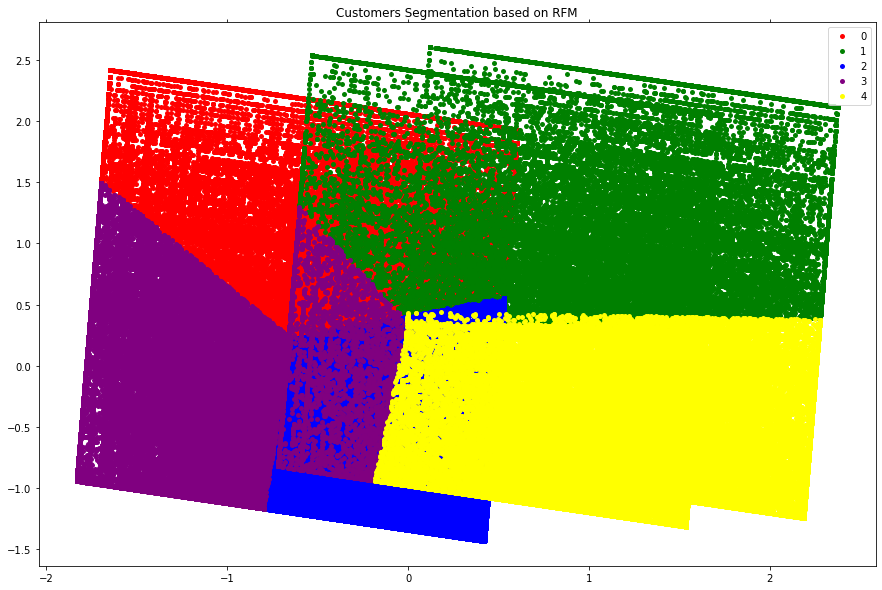

In [481]:
x, y = pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1]

colors = {0: 'red',
          1: 'green',
          2: 'blue', 
          3: 'purple', 
          4: 'yellow' 
         }

names = {0: '0' , 
         1: '1' ,
         2:  '2' ,
         3: '3', 
         4: '4'
        }
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':KMean_clust.labels_}) 
groups = df1.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on RFM")
plt.show()


- **Diamond**:it recency is minimum and also frequency and monetary is good(Loyal customer)
- **Silver**:dead customer but revenue was very high(we have to give some promo code or something else by which we can make alive)
- **Platinum**:Periodic customers who give good revenue with good frequency
- **Bronze**:dead customer nothing intresting with this customer
- **Gold**: newly customer with good revenue

### RFM Ckustering on Plant wise

In [482]:
df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,7005200005,174158,NaN,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


In [483]:
plant=df.groupby('Plant').agg({'Total Amt Wtd Tax.': lambda x:x.mean(), 'Invoice No': lambda x: len(x), 'ServiceHours': lambda x: x.mean()})
plant=plant.rename(columns={'Total Amt Wtd Tax.':'Avg_monetary','Invoice No':'Frequency'})
plant

,Avg_monetary,Frequency,ServiceHours
Plant,,,
BC01,4253.829093,14483,53.641090
BC02,3805.377264,8209,65.691455
BC03,3801.090226,28615,44.812268
BC04,5792.590989,4681,54.763775
BC05,5658.474461,13323,67.750484
...,...,...,...
X432,1586.622727,11,7.373636
X435,9064.557532,158,51.771582
X437,6462.696500,20,16.486000


In [484]:
#Split into four segments using quantiles
quantiles = plant.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [485]:
quantiles

{'Avg_monetary': {0.25: 2593.3481370558375,
  0.5: 3488.2381850611155,
  0.75: 4737.055632215255},
 'Frequency': {0.25: 256.0, 0.5: 855.5, 0.75: 2379.75},
 'ServiceHours': {0.25: 44.65265569578852,
  0.5: 66.51820227055336,
  0.75: 125.91467988617941}}

In [486]:
#Calculate Add F and M segment value columns in the existing dataset to show  F and M segment values
plant['M'] = plant['Avg_monetary'].apply(RScoring, args=('Avg_monetary',quantiles,))
plant['F'] = plant['Frequency'].apply(RScoring, args=('Frequency',quantiles,))
plant['S'] = plant['ServiceHours'].apply(FnMScoring, args=('ServiceHours',quantiles,))

In [487]:
# FM SCORE
plant['fms_score']=plant.M+plant.F+plant.S
plant.head()

,Avg_monetary,Frequency,ServiceHours,M,F,S,fms_score
Plant,,,,,,,
BC01,4253.829093,14483,53.641090,3,4,3,10
BC02,3805.377264,8209,65.691455,3,4,3,10
BC03,3801.090226,28615,44.812268,3,4,3,10
BC04,5792.590989,4681,54.763775,4,4,3,11
BC05,5658.474461,13323,67.750484,4,4,2,10


- More fms score is good plant on bussiness prospoctive

In [488]:
#Assign  rank labeling  to each plant
Rank_lebel = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(plant.fms_score, q = 4, labels = Rank_lebel)
plant['Rank_lebel'] = Score_cuts.values
plant.head()

,Avg_monetary,Frequency,ServiceHours,M,F,S,fms_score,Rank_lebel
Plant,,,,,,,,
BC01,4253.829093,14483,53.641090,3,4,3,10,Platinum
BC02,3805.377264,8209,65.691455,3,4,3,10,Platinum
BC03,3801.090226,28615,44.812268,3,4,3,10,Platinum
BC04,5792.590989,4681,54.763775,4,4,3,11,Platinum
BC05,5658.474461,13323,67.750484,4,4,2,10,Platinum


In [489]:
fm_avg=plant.groupby('Rank_lebel').agg({'Avg_monetary': lambda x:x.mean(), 'Frequency': lambda x:x.mean(),'ServiceHours': lambda x:x.mean()})
fm_avg

,Avg_monetary,Frequency,ServiceHours
Rank_lebel,,,
Bronze,2666.967206,351.193182,118.955208
Silver,4351.093953,1136.735294,99.351603
Gold,4249.040963,2310.763158,62.462970
Platinum,5054.856548,6172.958333,58.332158


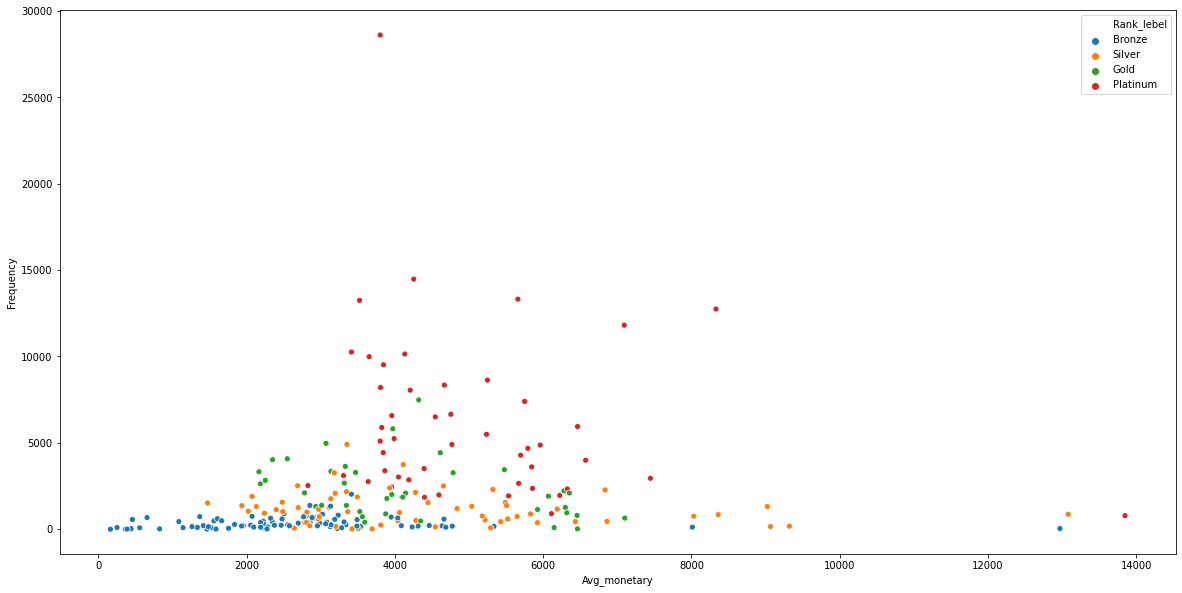

In [490]:
plt.figure(figsize=(20,10))
sns.scatterplot(plant['Avg_monetary'],plant['Frequency'],hue=plant['Rank_lebel'])

### Clustering Using Kmeans

In [491]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = plant[['Avg_monetary','Frequency','ServiceHours']].apply(np.log, axis = 1).round(3)

In [492]:
Log_Tfd_Data .describe()

,Avg_monetary,Frequency,ServiceHours
count,242.000000,242.000000,242.000000
mean,8.108475,6.610446,4.219851
std,0.612629,1.666984,0.883718
min,5.091000,0.000000,-1.514000
25%,7.860500,5.545000,3.799000
50%,8.157500,6.752000,4.197500
75%,8.463500,7.774750,4.835250
max,9.536000,10.262000,6.060000


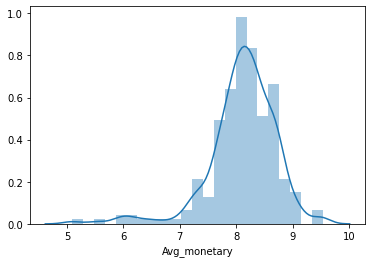

In [493]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Avg_monetary']
ax = sns.distplot(Recency_Plot)

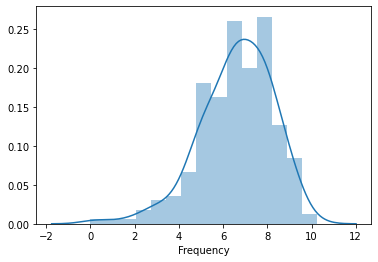

In [494]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)

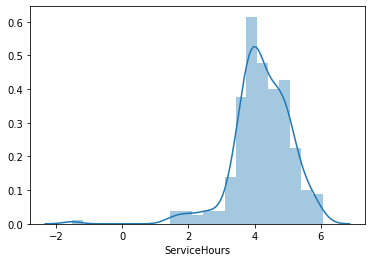

In [495]:

Frequency_Plot = Log_Tfd_Data['ServiceHours']
ax = sns.distplot(Frequency_Plot)

In [496]:
detect_outliers(Log_Tfd_Data)

Avg_monetary --------- 12
Frequency --------- 4
ServiceHours --------- 7


In [497]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = plant.index, columns = Log_Tfd_Data.columns)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  7.13it/s]


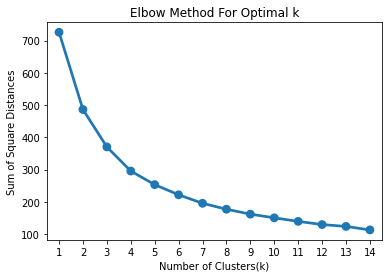

In [498]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in tqdm(range(1,15)):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [500]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
plant['Cluster'] = KMean_clust.labels_
plant.head()

,Avg_monetary,Frequency,ServiceHours,M,F,S,fms_score,Rank_lebel,Cluster
Plant,,,,,,,,,
BC01,4253.829093,14483,53.641090,3,4,3,10,Platinum,1
BC02,3805.377264,8209,65.691455,3,4,3,10,Platinum,1
BC03,3801.090226,28615,44.812268,3,4,3,10,Platinum,1
BC04,5792.590989,4681,54.763775,4,4,3,11,Platinum,1
BC05,5658.474461,13323,67.750484,4,4,2,10,Platinum,1


In [501]:
Scaled_Data['Cluster'] = KMean_clust.labels_

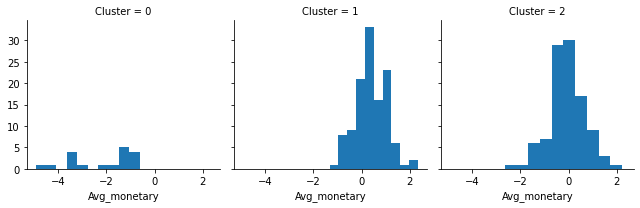

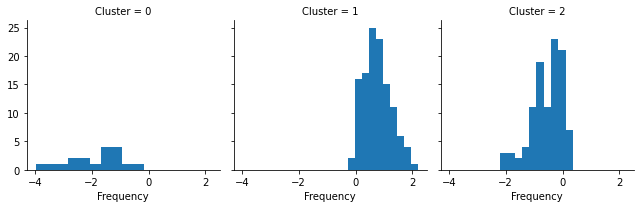

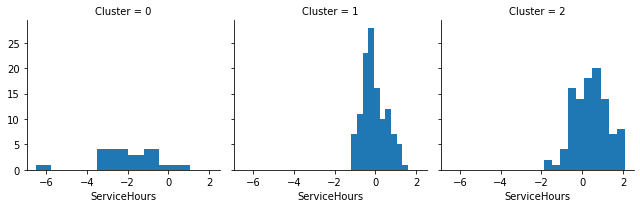

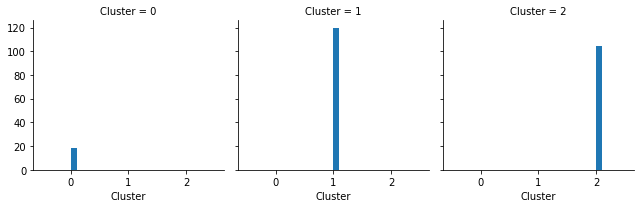

In [502]:
import seaborn as sns
for c in Scaled_Data:
    grid= sns.FacetGrid(Scaled_Data, col='Cluster')
    grid.map(plt.hist, c)

In [507]:
rfm_avg1=plant.groupby(['Cluster']).agg({'Avg_monetary': lambda x:x.sum(), 'Frequency': lambda x:x.sum(), 'ServiceHours': lambda x: x.sum()})
rfm_avg1


,Avg_monetary,Frequency,ServiceHours
Cluster,,,
0,20911.440544,1589,473.287926
1,547095.008996,447840,8872.029142
2,366657.724317,42885,13052.186749


In [509]:
rfm_avg1['Plant_efficiency']=rfm_avg1.Avg_monetary/(rfm_avg1.Frequency*rfm_avg1.ServiceHours)
rfm_avg1

,Avg_monetary,Frequency,ServiceHours,Plant_efficiency
Cluster,,,,
0,20911.440544,1589,473.287926,0.027806
1,547095.008996,447840,8872.029142,0.000138
2,366657.724317,42885,13052.186749,0.000655


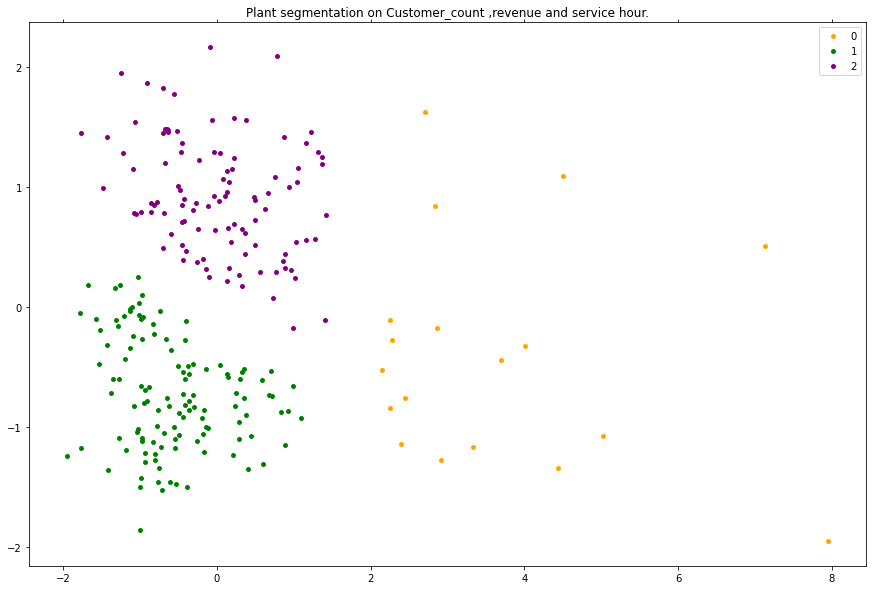

In [505]:
x, y = pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1]

colors = {0: 'orange',
          1: 'green',
          2: 'purple'
         }

names = {
         0: '0' ,
         1: '1' ,
         2: '2'
        }
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':KMean_clust.labels_}) 
groups = df1.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Plant segmentation on Customer_count ,revenue and service hour.")
plt.show()


**Silver**: Revenue,customer count and servicehour wise low 

**Gold**: More Busy plant, revenue is high and coustomer count is average

**Platinum**: More efficient plant ,customer count is very high with low service hour and revenue is also good

##  Clustering Data Origin 

In [246]:
origin=df.groupby('Data Origin')['Total Amt Wtd Tax.'].agg(['mean','count'])
origin

,mean,count
Data Origin,,
Z001,4234.388442,89820
Z002,3258.218941,39163
Z003,3291.733024,4928
Z004,4103.005386,23114
Z005,4539.320670,108328
Z006,4796.339758,86771
Z007,5904.147014,1919
Z008,4843.752860,19483
Z009,3550.681328,497


In [247]:
#Split into four segments using quantiles
quantiles = origin.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'mean': {0.25: 3549.249091099787,
  0.5: 4043.0148061777954,
  0.75: 4463.087612888717},
 'count': {0.25: 2578.25, 0.5: 8505.0, 0.75: 24260.75}}

In [248]:
#Calculate Add F and M segment value columns in the existing dataset to show  F and M segment values
origin['M'] = origin['mean'].apply(RScoring, args=('mean',quantiles,))
origin['F'] = origin['count'].apply(RScoring, args=('count',quantiles,))

In [249]:
# FM SCORE
origin['fm_score']=origin.M+origin.F
origin

,mean,count,M,F,fm_score
Data Origin,,,,,
Z001,4234.388442,89820,3,4,7
Z002,3258.218941,39163,1,4,5
Z003,3291.733024,4928,1,2,3
Z004,4103.005386,23114,3,3,6
Z005,4539.320670,108328,4,4,8
Z006,4796.339758,86771,4,4,8
Z007,5904.147014,1919,4,1,5
Z008,4843.752860,19483,4,3,7
Z009,3550.681328,497,2,1,3


In [250]:
#Assign  rank labeling  to each plant
Rank_lebel = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(origin.fm_score, q = 4, labels = Rank_lebel)
origin['Rank_lebel'] = Score_cuts.values
origin=origin.sort_values(by='fm_score')

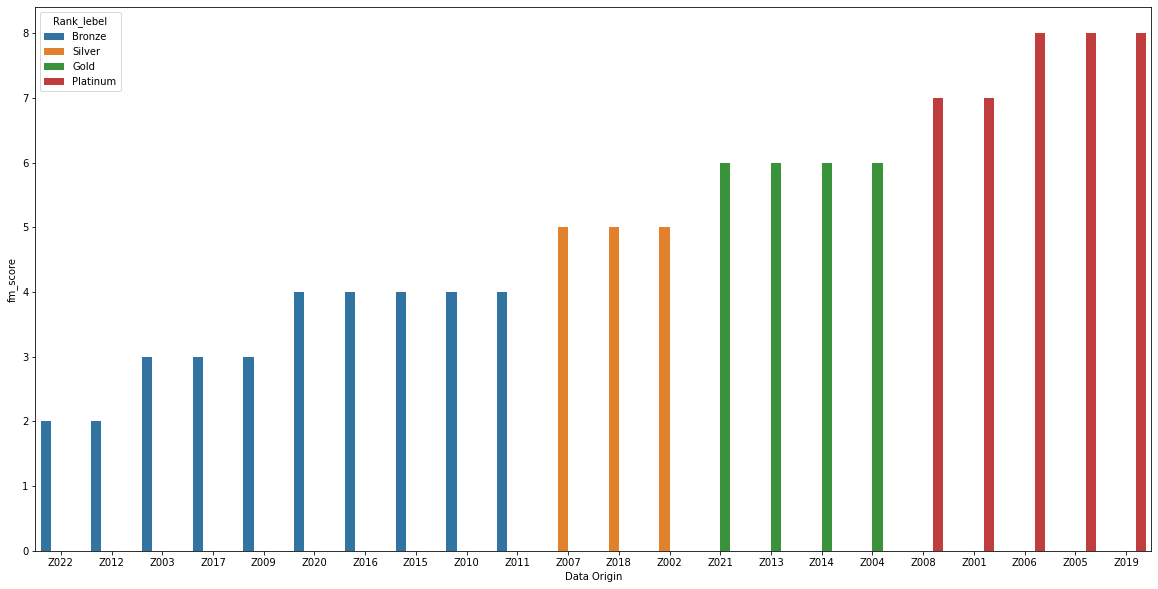

In [251]:
plt.figure(figsize=(20,10))
sns.barplot(origin.index,origin.fm_score,hue=origin['Rank_lebel'])

## Clustering using Kmeans

In [252]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data1 = origin[['mean', 'count']].apply(np.log, axis = 1).round(3)

In [253]:
Log_Tfd_Data1

,mean,count
Data Origin,,
Z022,7.868,3.892
Z012,7.754,7.639
Z003,8.099,8.503
Z017,8.174,8.814
Z009,8.175,6.209
Z020,8.306,6.635
Z016,8.203,8.913
Z015,8.350,6.608
Z010,8.304,8.314


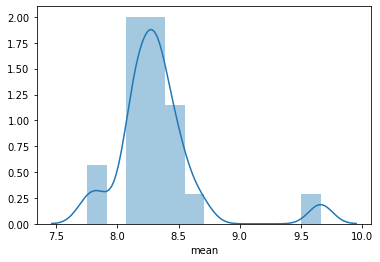

In [254]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data1['mean']
ax = sns.distplot(Recency_Plot)

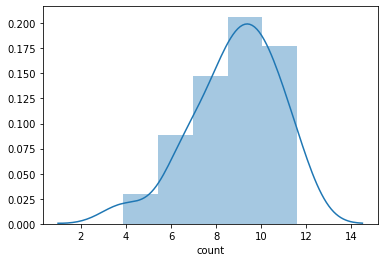

In [255]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data1['count']
ax = sns.distplot(Frequency_Plot)

In [267]:
detect_outliers(Log_Tfd_Data1)

mean --------- 0
count --------- 0


In [258]:
Log_Tfd_Data1=treat_outliers(Log_Tfd_Data1)

In [268]:
Log_Tfd_Data1

,mean,count
Data Origin,,
Z022,7.868,6.209
Z012,7.868,7.639
Z003,8.099,8.503
Z017,8.174,8.814
Z009,8.175,6.209
Z020,8.306,6.635
Z016,8.203,8.913
Z015,8.350,6.608
Z010,8.304,8.314


In [269]:
#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data1 = scaleobj.fit_transform(Log_Tfd_Data1)

#Transform it back to dataframe
Scaled_Data1 = pd.DataFrame(Scaled_Data1, index = origin.index, columns = Log_Tfd_Data1.columns)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 21.04it/s]


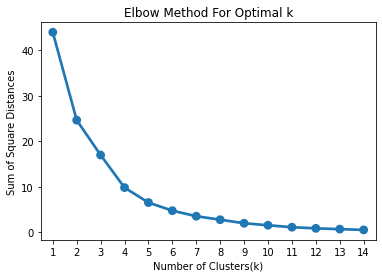

In [270]:
sum_of_sq_dist = {}
for k in tqdm(range(1,15)):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data1)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [271]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data1)

#Find the clusters for the observation given in the dataset
origin['Cluster'] = KMean_clust.labels_
origin

,mean,count,M,F,fm_score,Rank_lebel,Cluster,Color
Data Origin,,,,,,,,
Z022,2611.721633,49,1,1,2,Bronze,0,green
Z012,2330.626168,2077,1,1,2,Bronze,0,green
Z003,3291.733024,4928,1,2,3,Bronze,0,green
Z017,3548.771679,6725,1,2,3,Bronze,0,green
Z009,3550.681328,497,2,1,3,Bronze,2,red
Z020,4049.538423,761,3,1,4,Bronze,2,red
Z016,3653.058581,7426,2,2,4,Bronze,0,green
Z015,4228.720229,741,3,1,4,Bronze,2,red
Z010,4038.160252,4082,2,2,4,Bronze,2,red


<Figure size 504x504 with 0 Axes>

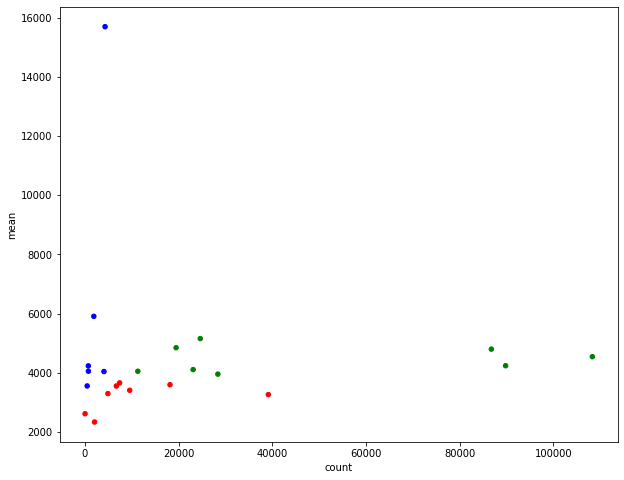

In [272]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
origin['Color'] = origin['Cluster'].map(lambda p: Colors[p])
ax = origin.plot(    
    kind="scatter", 
    x="count", y="mean",
    figsize=(10,8),
    c = origin['Color']
)
# plt.ylim(0,6000) 
# plt.xlim(0,10000)

### Clustering on Master data

In [510]:
master=pd.read_csv('master_data.csv').set_index('Unnamed: 0')
master1=master.iloc[:,4:].drop(['Avg_Revenue_modelwise','Monetary'],axis=1)
master

,state,City,Model,Order Type,age,Year,Avg_service_hour,Avg_Revenue_modelwise,Recency,Frequency,Monetary,CLV
Unnamed: 0,,,,,,,,,,,,
67849,Maharashtra,thane,SPARK,Paid Service,>5,2015,62.268571,5120.082143,668,5,30458.92,25600.410714
84419,Maharashtra,thane,INDICA,SMC Value Package,>5,2015,12.475000,1001.290000,322,6,1137.06,6007.740000
81055,Maharashtra,thane,ZEN,Running Repairs,>5,2015,61.300455,3308.383750,319,3,6265.19,9925.151250
18980,Maharashtra,thane,SANTRO XING,Paid Service,>5,2015,46.010000,3290.067778,323,8,27168.71,26320.542222
84457,Maharashtra,thane,INNOVA,Running Repairs,1-3,2015,9.450000,705.306667,254,3,3912.61,2115.920000
...,...,...,...,...,...,...,...,...,...,...,...,...
203817,Tamil Nadu,chennai,SWIFT,Paid Service,>5,2016,83.806591,5225.976667,123,1,1804.43,5225.976667
203808,Tamil Nadu,chennai,RITZ,Paid Service,1-3,2016,31.743333,2229.070000,123,1,2229.07,2229.070000
203844,Tamil Nadu,chennai,XYLO,Paid Service,>5,2016,68.558768,13267.414058,123,1,12052.14,13267.414058


In [511]:
cluster=master1.copy()

In [512]:
cluster=pd.get_dummies(cluster)

In [513]:
cluster

,Year,Avg_service_hour,Recency,Frequency,CLV,age_1-3,age_3-5,age_<1,age_>5
Unnamed: 0,,,,,,,,,
67849,2015,62.268571,668,5,25600.410714,0,0,0,1
84419,2015,12.475000,322,6,6007.740000,0,0,0,1
81055,2015,61.300455,319,3,9925.151250,0,0,0,1
18980,2015,46.010000,323,8,26320.542222,0,0,0,1
84457,2015,9.450000,254,3,2115.920000,1,0,0,0
...,...,...,...,...,...,...,...,...,...
203817,2016,83.806591,123,1,5225.976667,0,0,0,1
203808,2016,31.743333,123,1,2229.070000,1,0,0,0
203844,2016,68.558768,123,1,13267.414058,0,0,0,1


In [514]:
#Perform Log transformation to bring data into normal or near normal distribution
cluster = cluster[['Avg_service_hour', 'Recency', 'Frequency','CLV']].apply(np.log1p, axis = 1).round(3)

In [519]:
cluster.head()

,Avg_service_hour,Recency,Frequency,CLV
Unnamed: 0,,,,
67849,4.147,6.269,1.609,9.974
84419,2.601,5.778,1.609,8.701
81055,4.132,5.768,1.386,9.203
18980,3.850,5.781,1.609,9.974
84457,2.347,5.541,1.386,7.658


In [520]:
detect_outliers(cluster)

Avg_service_hour --------- 0
Recency --------- 0
Frequency --------- 0
CLV --------- 0


In [521]:
cluster=treat_outliers(cluster)

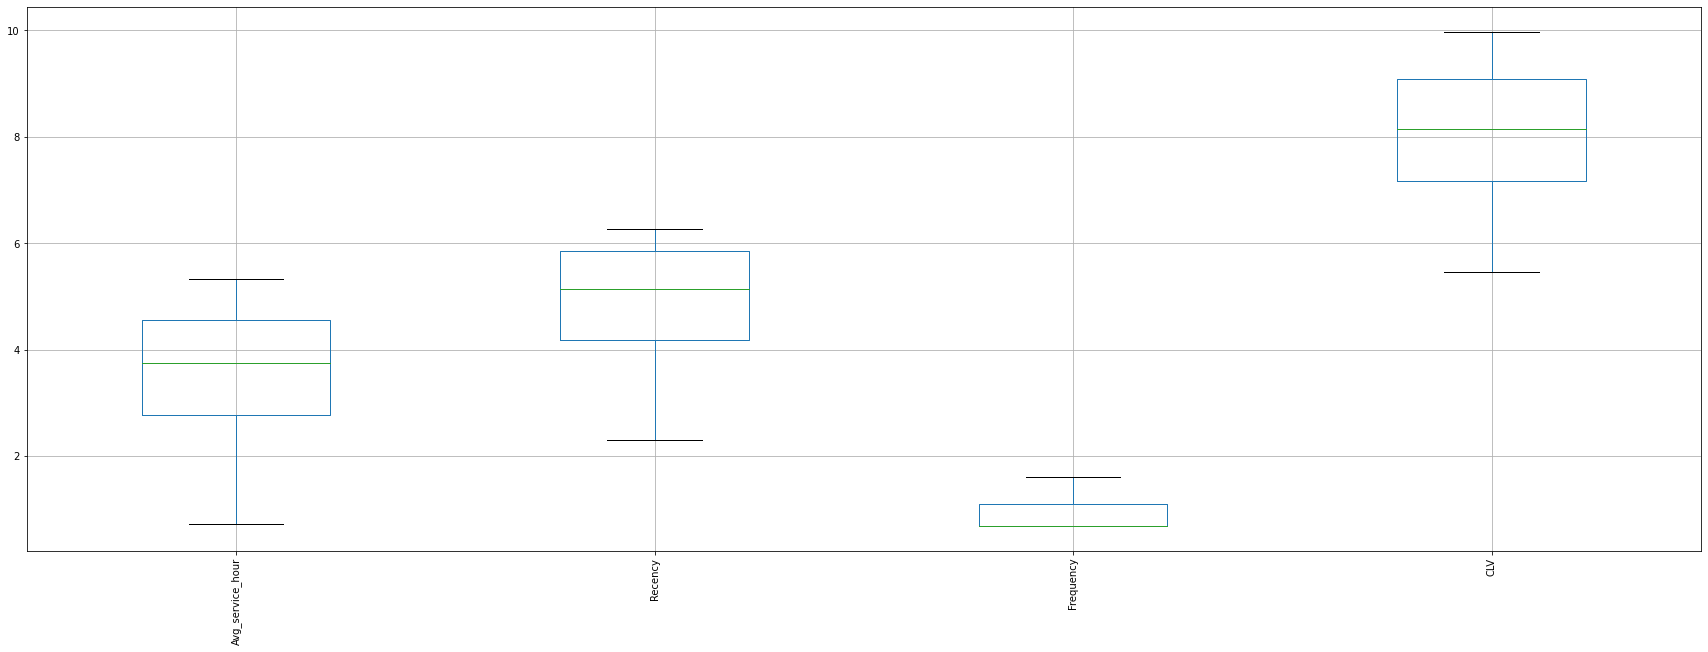

In [522]:
cluster.boxplot(rot=90, figsize=(30,10))

In [523]:
cluster

,Avg_service_hour,Recency,Frequency,CLV
Unnamed: 0,,,,
67849,4.147,6.269,1.609,9.974
84419,2.601,5.778,1.609,8.701
81055,4.132,5.768,1.386,9.203
18980,3.850,5.781,1.609,9.974
84457,2.347,5.541,1.386,7.658
...,...,...,...,...
203817,4.440,4.820,0.693,8.562
203808,3.489,4.820,0.693,7.710
203844,4.242,4.820,0.693,9.493


In [524]:
#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(cluster)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = cluster.index, columns = cluster.columns)

In [1]:
sum_of_sq_dist = {}
for k in tqdm(range(1,15)):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [525]:
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
master['Cluster'] = KMean_clust.labels_
Scaled_Data['Cluster'] = KMean_clust.labels_
master.head()

,state,City,Model,Order Type,age,Year,Avg_service_hour,Avg_Revenue_modelwise,Recency,Frequency,Monetary,CLV,Cluster
Unnamed: 0,,,,,,,,,,,,,
67849,Maharashtra,thane,SPARK,Paid Service,>5,2015,62.268571,5120.082143,668,5,30458.92,25600.410714,3
84419,Maharashtra,thane,INDICA,SMC Value Package,>5,2015,12.475000,1001.290000,322,6,1137.06,6007.740000,3
81055,Maharashtra,thane,ZEN,Running Repairs,>5,2015,61.300455,3308.383750,319,3,6265.19,9925.151250,3
18980,Maharashtra,thane,SANTRO XING,Paid Service,>5,2015,46.010000,3290.067778,323,8,27168.71,26320.542222,3
84457,Maharashtra,thane,INNOVA,Running Repairs,1-3,2015,9.450000,705.306667,254,3,3912.61,2115.920000,3


In [526]:
master[master.Cluster==0]['age'].mode()

0    >5
dtype: object

In [527]:
Scaled_Data

,Avg_service_hour,Recency,Frequency,CLV,Cluster
Unnamed: 0,,,,,
67849,0.456600,1.186045,2.046589,1.467082,3
84419,-0.703760,0.758922,2.046589,0.500008,3
81055,0.445341,0.750222,1.376614,0.881368,3
18980,0.233685,0.761531,2.046589,1.467082,3
84457,-0.894401,0.552754,1.376614,-0.292340,3
...,...,...,...,...,...
203817,0.676513,-0.074448,-0.705415,0.394412,0
203808,-0.037266,-0.074448,-0.705415,-0.252836,0
203844,0.527903,-0.074448,-0.705415,1.101675,0


In [528]:
fm_avg=master.groupby('Cluster').agg({'Avg_service_hour': lambda x:x.median(), 'Recency': lambda x:x.median(),'Frequency': lambda x:x.median(),'CLV': lambda x:x.median()})
fm_avg

,Avg_service_hour,Recency,Frequency,CLV
Cluster,,,,
0,64.157500,281,1,3210.677500
1,4.365000,145,1,658.009375
2,63.071429,31,1,3162.445417
3,45.864375,216,3,13473.784348


In [530]:
fm_avg=master.groupby('Cluster').agg({'Avg_service_hour': lambda x:x.mean(), 'Recency': lambda x:x.mean(),'Frequency': lambda x:x.mean(),'CLV': lambda x:x.mean()})
fm_avg

,Avg_service_hour,Recency,Frequency,CLV
Cluster,,,,
0,115.451210,314.574877,1.096167,5711.594966
1,8.121411,196.034812,1.248389,1265.029768
2,118.214602,32.184185,1.372344,6282.767785
3,81.588790,256.748083,4.372027,25016.418031


In [532]:
quantiles = master.CLV.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{0.25: 1289.26875, 0.5: 3444.25, 0.75: 8791.567500000001}

0: Old customer (dead customer)with avg clv value
1: highest clv with good frequency
2: recent customer with avg clv
3: low clv customer with low frequecy

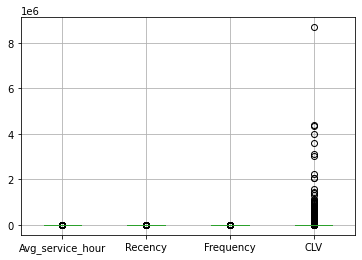

In [99]:
master_data[['Avg_service_hour','Recency','Frequency','CLV']].boxplot()

In [100]:
# for c in cluster:
#     grid= sns.FacetGrid(cluster, col='Cluster')
#     grid.map(plt.hist, c)
#     #plt.xtics(rotation=90)

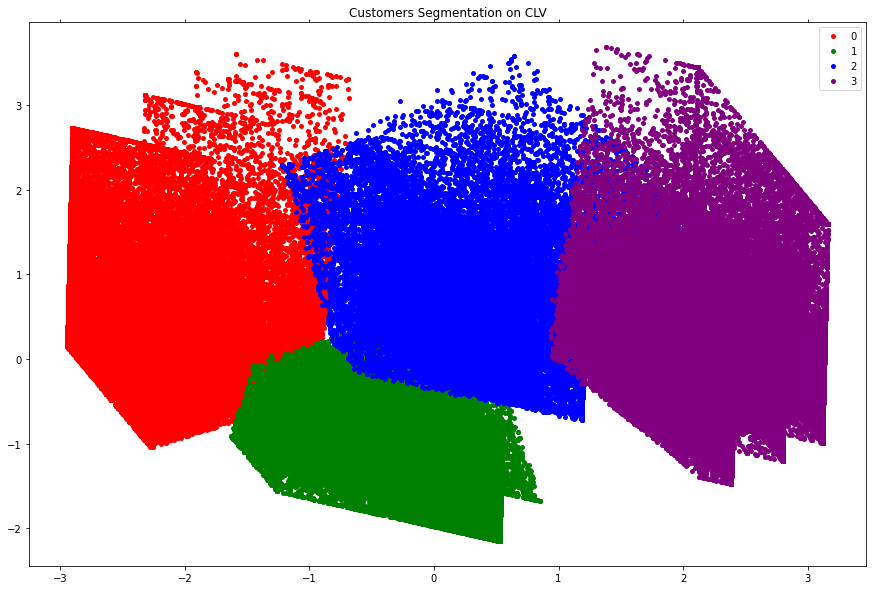

In [303]:
x, y = pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1]

colors = {0: 'red',
          1: 'green',
          2: 'blue', 
          3: 'purple' 
         }

names = {0:'0',
         1: '1',
         2: '2',
         3: '3'
        }
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':KMean_clust.labels_}) 
groups = df1.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation on CLV")
plt.show()


0:'Old customer (dead customer)with avg clv value',
         1: 'highest clv with good frequency',
         2: 'recent customer with avg clv',
         3: 'low clv customer with low frequecy'

In [304]:
master.to_csv('master1.csv')

In [305]:
master

,state,City,Model,Order Type,age,Year,Avg_service_hour,Avg_Revenue_modelwise,Recency,Frequency,Monetary,CLV,Cluster
Unnamed: 0,,,,,,,,,,,,,
67849,Maharashtra,thane,SPARK,Paid Service,>5,2015,62.268571,5120.082143,668,5,30458.92,25600.410714,3
84419,Maharashtra,thane,INDICA,SMC Value Package,>5,2015,12.475000,1001.290000,322,6,1137.06,6007.740000,3
81055,Maharashtra,thane,ZEN,Running Repairs,>5,2015,61.300455,3308.383750,319,3,6265.19,9925.151250,3
18980,Maharashtra,thane,SANTRO XING,Paid Service,>5,2015,46.010000,3290.067778,323,8,27168.71,26320.542222,3
84457,Maharashtra,thane,INNOVA,Running Repairs,1-3,2015,9.450000,705.306667,254,3,3912.61,2115.920000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203817,Tamil Nadu,chennai,SWIFT,Paid Service,>5,2016,83.806591,5225.976667,123,1,1804.43,5225.976667,1
203808,Tamil Nadu,chennai,RITZ,Paid Service,1-3,2016,31.743333,2229.070000,123,1,2229.07,2229.070000,1
203844,Tamil Nadu,chennai,XYLO,Paid Service,>5,2016,68.558768,13267.414058,123,1,12052.14,13267.414058,1


## new cluster

In [552]:
df1 = pd.read_csv("cust_inv_merged_final.csv")
df1.head()

,Unnamed: 0,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,3,7005200005,174158,84419,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


In [553]:
df1['Avg_Revenue'] = df1.groupby(['Zones','Data Origin','Model Category','Order Type','age','Season'])['Total Amt Wtd Tax.'].transform('mean')
df1['Avg_service_hour'] = df1.groupby(['Zones','Data Origin','Model Category','Order Type','age','Season'])['ServiceHours'].transform('mean')

In [554]:
df1['Customer No.']=df1['Customer No.'].drop_duplicates()

In [555]:
df1=df1.dropna()

In [556]:
df3=df1.copy()

In [557]:
df1.set_index('Customer No.')

,Unnamed: 0,Invoice No,Job Card No,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Avg_Revenue,Avg_service_hour
Customer No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67849,0,7005200002,168303,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95,3509.999091,82.245455
84419,1,7005200003,173997,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29,3255.839048,1.616857
81055,2,7005200004,173889,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14,2512.229063,50.404087
18980,4,7005200006,173860,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12,3809.904155,70.803090
84457,5,7005200007,174053,Retail,1,Running Repairs,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TOYOTA,INNOVA,1566000,High Range,01-Mar,0,20.90,0 days 20:54:58.000000000,13122,2015,1,Winter,0.00,14.22,851.70,0.00,0.0,865.92,2860.636923,31.486154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203817,492303,7231000011,400080,Retail,1,Paid Service,Z019,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MARUTI SUZUKI,SWIFT,519000,Budget Friendly,>5,0,5.03,0 days 05:02:09.000000000,32173,2016,6,Monsoon,774.03,1030.40,0.00,0.00,0.0,1804.43,5039.002012,75.420593
203808,492307,7231000015,400074,Retail,1,Paid Service,Z019,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MARUTI SUZUKI,RITZ,506000,Budget Friendly,01-Mar,0,6.03,0 days 06:02:12.000000000,15905,2016,6,Monsoon,1346.90,882.17,0.00,0.00,0.0,2229.07,3162.033600,55.487400
203844,492308,7231000016,400150,Retail,1,Paid Service,Z001,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MAHINDRA & MAHINDRA,XYLO,917000,Mid Range,>5,0,4.52,0 days 04:31:24.000000000,100165,2016,6,Monsoon,5063.08,6989.06,0.00,0.00,0.0,12052.14,7847.611930,81.649250


In [558]:
df1=df1[['Customer No.','Order Type','Total Amt Wtd Tax.','ServiceHours']]
df1.head()

,Customer No.,Order Type,Total Amt Wtd Tax.,ServiceHours
0,67849,Paid Service,4051.95,477.00
1,84419,SMC Value Package,1001.29,19.92
2,81055,Running Repairs,233.14,23.53
4,18980,Paid Service,2747.12,25.35
5,84457,Running Repairs,865.92,20.90


In [559]:
#df1.age=df1.age.replace('03-May','3-5').replace('01-Mar','1-3')

In [560]:
df1=df1.set_index('Customer No.')
df1

,Order Type,Total Amt Wtd Tax.,ServiceHours
Customer No.,,,
67849,Paid Service,4051.95,477.00
84419,SMC Value Package,1001.29,19.92
81055,Running Repairs,233.14,23.53
18980,Paid Service,2747.12,25.35
84457,Running Repairs,865.92,20.90
...,...,...,...
203817,Paid Service,1804.43,5.03
203808,Paid Service,2229.07,6.03
203844,Paid Service,12052.14,4.52


In [561]:
df=df1.copy()

In [562]:
#Perform Log transformation to bring data into normal or near normal distribution
df[['ServiceHours', 'Total Amt Wtd Tax.']]= df[['ServiceHours', 'Total Amt Wtd Tax.']].apply(np.log1p, axis = 1).round(3)

In [563]:
detect_outliers(df)

Total Amt Wtd Tax. --------- 22117
ServiceHours --------- 0


In [564]:
df=treat_outliers(df)
df

,Order Type,Total Amt Wtd Tax.,ServiceHours
Customer No.,,,
67849,Paid Service,8.307,5.284
84419,Running Repairs,6.910,3.041
81055,Running Repairs,5.456,3.200
18980,Paid Service,7.919,3.271
84457,Running Repairs,6.765,3.086
...,...,...,...
203817,Paid Service,7.499,1.797
203808,Paid Service,7.710,1.950
203844,Paid Service,9.270,1.708


In [565]:
# df=pd.get_dummies(df)
df.select_dtypes(include=object)

,Order Type
Customer No.,
67849,Paid Service
84419,Running Repairs
81055,Running Repairs
18980,Paid Service
84457,Running Repairs
...,...
203817,Paid Service
203808,Paid Service
203844,Paid Service


In [566]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for col in df.select_dtypes(include=object).columns:
    df[col]=lab.fit_transform(df[col])

In [567]:
#Bring the data on same scale
Scaled_Data = scaleobj.fit_transform(df)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = df.index, columns = df.columns)

In [568]:
# sum_of_sq_dist = {}
# for k in tqdm(range(1,15)):
#     km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
#     km = km.fit(Scaled_Data)
#     sum_of_sq_dist[k] = km.inertia_
    
# #Plot the graph for the sum of square distance values and Number of Clusters
# sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
# plt.xlabel('Number of Clusters(k)')
# plt.ylabel('Sum of Square Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [569]:
# import seaborn as sns
# for c in Scaled_Data:
#     grid= sns.FacetGrid(Scaled_Data, col='Cluster')
#     grid.map(plt.hist, c)

In [570]:
KMean_clust = KMeans(n_clusters= 6, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
Scaled_Data['Cluster'] = KMean_clust.labels_
df3['Cluster']=KMean_clust.labels_
df1['Cluster']=KMean_clust.labels_

In [325]:
# import seaborn as sns
# for c in df1:
#     grid= sns.FacetGrid(df1, col='Cluster')
#     grid.map(plt.hist, c)

In [571]:
df1.head()

,Order Type,Total Amt Wtd Tax.,ServiceHours,Cluster
Customer No.,,,,
67849,Paid Service,4051.95,477.00,2
84419,SMC Value Package,1001.29,19.92,0
81055,Running Repairs,233.14,23.53,0
18980,Paid Service,2747.12,25.35,2
84457,Running Repairs,865.92,20.90,0


In [572]:
#df1.groupby(['Cluster','Order Type']).count()
cluster=df1.groupby(['Cluster','Order Type']).agg({'Order Type': lambda x:len(x),'Total Amt Wtd Tax.': lambda x:x.mean(), 'ServiceHours': lambda x:x.mean()})
cluster[cluster['Order Type']>800]

Order Type  Total Amt Wtd Tax.  ServiceHours
Cluster Order Type                                                     
0       Running Repairs         47488         4814.266871    133.691702
1       Mechanical                828            0.255085     56.500954
        Paid Service             2992            0.603753     80.117811
        Running Repairs         17446            0.553660     46.735794
        SMC Redemption           1076            0.000000     44.323755
2       Mechanical               2261         2669.016081     92.590690
        Paid Service            41056         6392.687646    136.241476
3       Running Repairs         72806         1059.441568      2.954834
        SMC Value Package        4601         3432.369952      0.971650
4       Accidental               2956         8821.310419      2.880575
        Mechanical               3711         1772.394551      3.498230
        Paid Service            33789         2911.366326      4.371197
5       Accidental              20259        21419.490191    249.299248
        Mechanical               1332         9985.086997    316.839092

In [328]:
df1.groupby(['Cluster','Order Type']).count().reset_index()

,Cluster,Order Type,Total Amt Wtd Tax.,ServiceHours
0,0,Accidental,20259,20259
1,0,Mechanical,1334,1334
2,1,Running Repairs,72808,72808
3,1,SMC Value Package,4601,4601
4,1,WBW Order,3,3
5,2,Accidental,2956,2956
6,2,Mechanical,3710,3710
7,2,Paid Service,33788,33788
8,3,Running Repairs,47486,47486
9,3,SMC Redemption,2,2


In [573]:
cluster=df1.groupby(['Cluster']).agg({'Order Type': lambda x:len(x),'Total Amt Wtd Tax.': lambda x:x.mean(), 'ServiceHours': lambda x:x.mean()})
cluster[['Total Amt Wtd Tax.','ServiceHours']]

,Total Amt Wtd Tax.,ServiceHours
Cluster,,
0,4800.677982,133.090745
1,0.515265,55.445665
2,6198.324661,133.963053
3,1200.962228,2.837032
4,3238.711355,4.182205
5,20714.074738,253.465941


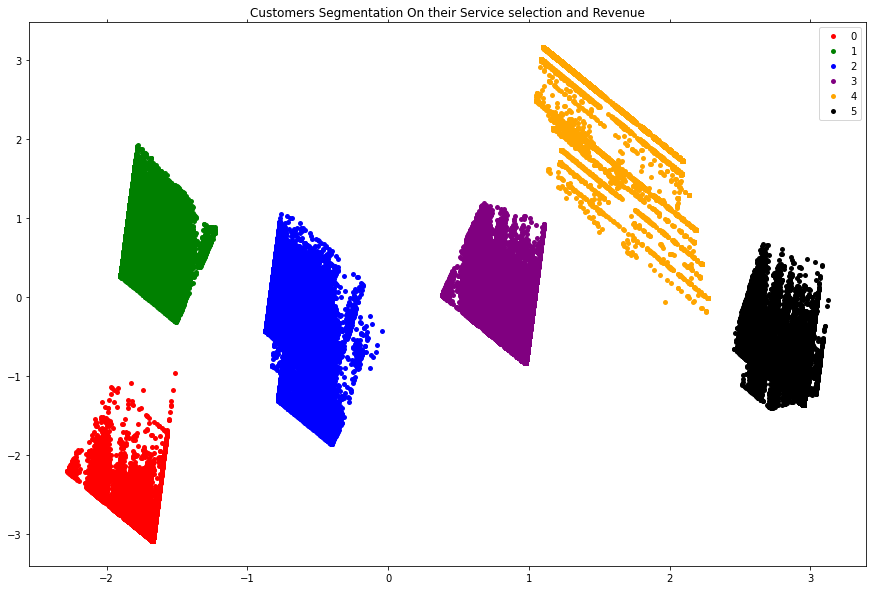

In [333]:
from sklearn.cluster import KMeans
x, y = pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1]

colors = {0: 'red',
          1: 'green',
          2: 'blue', 
          3: 'purple',
          4: 'orange',
          5: 'black',
         }

names = {0:'0',
         1: '1',
         2: '2',
         3: '3',
         4:'4',
         5: '5'
        }
  
df2 = pd.DataFrame({'x': x, 'y':y, 'label':KMean_clust.labels_}) 
groups = df2.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation On their Service selection and Revenue")
plt.show()

0: mostly running repair types  with low revenue customer 

1:mechanical and paid service customers with average revenue customer..

2:mostly less revenue customer 

3:mostly accidental types  customer 

4:running repairs types customer with average revenue customer 

5:highly revenue generated customer with paid service and mechanical

In [331]:
df3

,Unnamed: 0,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Avg_Revenue,Avg_service_hour,Cluster
0,0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95,3509.999091,82.245455,5
1,1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29,3255.839048,1.616857,3
2,2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14,2512.229063,50.404087,3
4,4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12,3809.904155,70.803090,5
5,5,7005200007,174053,84457,Retail,1,Running Repairs,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TOYOTA,INNOVA,1566000,High Range,01-Mar,0,20.90,0 days 20:54:58.000000000,13122,2015,1,Winter,0.00,14.22,851.70,0.00,0.0,865.92,2860.636923,31.486154,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492303,492303,7231000011,400080,203817,Retail,1,Paid Service,Z019,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MARUTI SUZUKI,SWIFT,519000,Budget Friendly,>5,0,5.03,0 days 05:02:09.000000000,32173,2016,6,Monsoon,774.03,1030.40,0.00,0.00,0.0,1804.43,5039.002012,75.420593,2
492307,492307,7231000015,400074,203808,Retail,1,Paid Service,Z019,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MARUTI SUZUKI,RITZ,506000,Budget Friendly,01-Mar,0,6.03,0 days 06:02:12.000000000,15905,2016,6,Monsoon,1346.90,882.17,0.00,0.00,0.0,2229.07,3162.033600,55.487400,2
492308,492308,7231000016,400150,203844,Retail,1,Paid Service,Z001,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MAHINDRA & MAHINDRA,XYLO,917000,Mid Range,>5,0,4.52,0 days 04:31:24.000000000,100165,2016,6,Monsoon,5063.08,6989.06,0.00,0.00,0.0,12052.14,7847.611930,81.649250,2
492309,492309,7231000017,400100,203820,Retail,1,Paid Service,Z016,X405SA1,X405,X405 - NANGAN MOTORS PVT. LTD.,chennai,Tamil Nadu,South,MARUTI SUZUKI,ALTO,294000,Budget Friendly,>5,0,5.68,0 days 05:41:46.000000000,72546,2016,6,Monsoon,2495.90,1587.28,0.00,374.97,0.0,4458.15,6205.556797,152.366250,2


In [332]:
model=df3.groupby(['Cluster','Model Category'])['Invoice No'].count().reset_index()

In [181]:
model[model['Invoice No']>100][model[model['Invoice No']>100].Cluster==0].sort_values(by='Invoice No',ascending=False)

,Cluster,Model Category,Invoice No
0,0,Budget Friendly,24528
3,0,Mid Range,17802
1,0,High Range,4860
2,0,Luxury,812


## Skill technitian clustering

In [574]:
invoice=pd.read_csv('Final_invoice.csv')
cust_inv = pd.read_csv("cust_inv_merged_final.csv")
cust_inv.head()

,Unnamed: 0,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,3,7005200005,174158,84419,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


In [575]:
inv=invoice[['Customer No.','Plant','Technician Name','Labour Total']].set_index('Customer No.')

In [576]:
cust=cust_inv[['Customer No.','ServiceHours']].set_index('Customer No.')

In [577]:
tech=pd.concat([inv,cust],axis=1)

In [578]:
tech=tech.dropna()

In [579]:
tech['Technician Name']=tech['Technician Name'].str.lower()

In [580]:
tech['New_tech']=tech.Plant+'_'+tech['Technician Name']

In [581]:
tech=tech.drop('Plant',axis=1)

In [582]:
tech=tech.drop('Technician Name',axis=1)

In [583]:
tech=tech.groupby('New_tech').agg({'Labour Total': lambda x:x.mean(),'ServiceHours': lambda x:x.mean(), 'New_tech': lambda x:len(x)})

In [584]:
tech.columns=['avg_laboure','avg_servicetime','Count']

In [585]:
tech

,avg_laboure,avg_servicetime,Count
New_tech,,,
BC01_3m,577.313333,4.293333,3
BC01_4303509,3455.920000,143.150000,1
BC01_4303612,2377.550000,193.050000,1
BC01_4303613,2450.400000,480.030000,1
BC01_aajam,994.787500,52.127750,40
...,...,...,...
X175_imran khan,2206.010000,103.773750,8
X175_khaled,8908.245000,110.136111,18
X175_khalid,7278.290000,2.150000,1


In [586]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data =tech.apply(np.log1p, axis = 1).round(3)

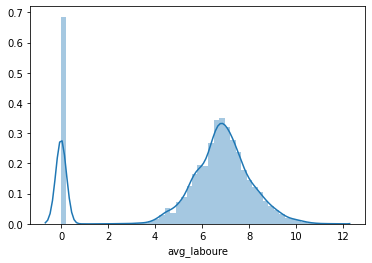

In [587]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['avg_laboure']
ax = sns.distplot(Recency_Plot)

In [588]:

detect_outliers(Log_Tfd_Data)

avg_laboure --------- 2158
avg_servicetime --------- 0
Count --------- 1507


In [589]:
Log_Tfd_Data=treat_outliers(Log_Tfd_Data)

In [590]:
#Bring the data on same scale
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = tech.index, columns = tech.columns)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:16<00:00,  1.17s/it]


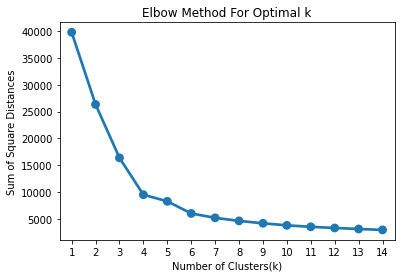

In [591]:
sum_of_sq_dist = {}
for k in tqdm(range(1,15)):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [592]:
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
Scaled_Data['Cluster'] = KMean_clust.labels_
tech['Cluster']=KMean_clust.labels_

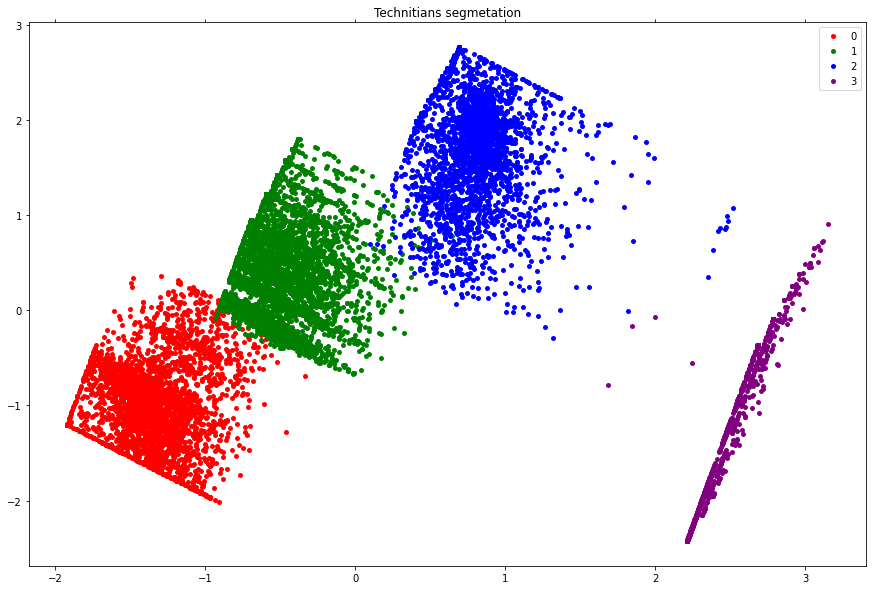

In [593]:
from sklearn.cluster import KMeans
x, y = pca.fit_transform(Scaled_Data)[:,0],pca.fit_transform(Scaled_Data)[:,1]

colors = {0: 'red',
          1: 'green',
          2: 'blue', 
          3: 'purple',
          4: 'orange',
          5: 'black',
         }

names = {0:'0',
         1: '1',
         2: '2',
         3: '3',
         4:'4',
         5: '5'
        }
  
df2 = pd.DataFrame({'x': x, 'y':y, 'label':KMean_clust.labels_}) 
groups = df2.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Technitians segmetation")
plt.show()